In [1]:
import pandas as pd

In [48]:
#ligne 35: le file était à sauvegarder sous le nom "datat"

#datat = pd.ExcelFile("data.xlsx") ##sans le read_excel, le fichier est inexploitable ensuite

datat = pd.read_excel (r'data.xlsx')
print (datat)

      Country  OrderDate DeliverDate Item  ShippedUnits
0     Belgium 2007-10-01  2007-10-04    a            10
1     Germany 2007-10-02  2007-10-06    b             2
2          UK 2007-10-06  2007-10-15    b            10
3     Belgium 2007-10-06  2007-10-12    c             4
4     Belgium 2007-10-06  2007-10-07    c             2
...       ...        ...         ...  ...           ...
9995       UK 2019-05-21  2019-05-22    c             4
9996  Germany 2019-05-21  2019-05-22    a             4
9997   France 2019-05-21  2019-05-24    b             2
9998   France 2019-05-22  2019-05-25    a             3
9999   France 2019-05-22  2019-05-22    a             1

[10000 rows x 5 columns]


In [23]:
print(datat.sheet_names)
shipping_data =  pd.read_excel(datat, sheet_name='data')


['data']


In [50]:
##ligne 57
#Exercise: show the 5 first rows of datat

datat.head(n=5)


##ligne 63
shipping_data.tail(n=3)



,Country,OrderDate,DeliverDate,Item,ShippedUnits
0,Belgium,2007-10-01,2007-10-04,a,10
1,Germany,2007-10-02,2007-10-06,b,2
2,UK,2007-10-06,2007-10-15,b,10
3,Belgium,2007-10-06,2007-10-12,c,4
4,Belgium,2007-10-06,2007-10-07,c,2


In [45]:
###ligne 70
#shipping_data.sort_values(by="ShippedUnits", ascending = False).head(n=5)
#il y avait un espace en trop entre Shipped & Units sur ta formule mais elle marche
shipping_data.nlargest(5, 'ShippedUnits')

,Country,OrderDate,DeliverDate,Item,ShippedUnits
0,Belgium,2007-10-01,2007-10-04,a,10
7501,France,2016-07-31,2016-08-02,c,10
1655,France,2009-07-26,2009-07-27,b,10
1657,France,2009-07-27,2009-07-28,c,10
7669,Belgium,2016-10-08,2016-10-10,c,10


In [47]:
shipping_data[shipping_data['Country']=="France"]

,Country,OrderDate,DeliverDate,Item,ShippedUnits
6,France,2007-10-11,2007-10-13,a,4
8,France,2007-10-11,2007-10-11,b,3
9,France,2007-10-11,2007-10-15,b,2
10,France,2007-10-11,2007-10-16,b,1
11,France,2007-10-12,2007-10-14,a,3
...,...,...,...,...,...
9987,France,2019-05-18,2019-05-23,b,2
9994,France,2019-05-21,2019-05-23,b,4
9997,France,2019-05-21,2019-05-24,b,2
9998,France,2019-05-22,2019-05-25,a,3


In [21]:
# Show the rows where (Shipped Units > 3) & (Country == France)
#dans ta réponse le tri était fait par "Item = a" au lieu de country = France

shipping_data[(shipping_data['Country']=="France") & (shipping_data['ShippedUnits']>3)].sort_index

#Vu le "correct result" qu'ils donnent j'ai l'impression qu'ils trient par numéro de ligne
#d'où le "sort_index", mais ça ne donne pas le même tableau
#pour trier par une autre colonne: .sort_values(by="col_name")


<bound method DataFrame.sort_index of      Country  OrderDate DeliverDate Item  ShippedUnits
6     France 2007-10-11  2007-10-13    a             4
21    France 2007-10-17  2007-10-20    a             4
36    France 2007-10-22  2007-10-24    a             6
37    France 2007-10-23  2007-10-24    b            10
59    France 2007-10-30  2007-10-30    a             4
...      ...        ...         ...  ...           ...
9948  France 2019-05-05  2019-05-08    b             6
9954  France 2019-05-08  2019-05-11    b             4
9962  France 2019-05-11  2019-05-14    c            10
9967  France 2019-05-12  2019-05-14    a             4
9994  France 2019-05-21  2019-05-23    b             4

[946 rows x 5 columns]>

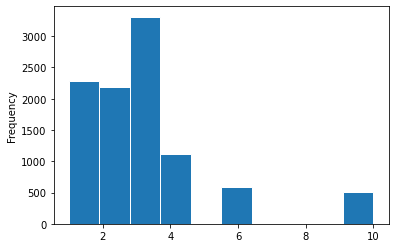

In [58]:
# Ligne 97 histograms
shipping_data['ShippedUnits'].plot.hist(edgecolor="white")

#Je sais pas quels histogrammes ils demandent ? là j'ai juste ajouté la couleur 
#des contours en blanc pour délimiter les "bins"

#shipping_data['Country'].value_counts().plot(kind='bar')

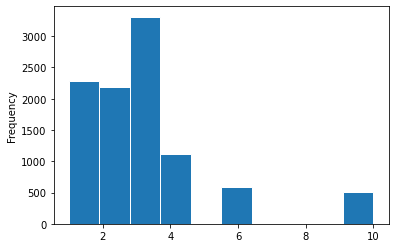

In [59]:
#ligne 108
#pareil je sais pas quels histo ils veulent? 
#en plus ça va être la même data
#mais du coup même formule

datat['ShippedUnits'].plot.hist(edgecolor="white")


In [64]:
#ligne 114 
#group by quoi ? ici groupé par date de commande
tims = shipping_data.groupby(shipping_data['OrderDate']).sum()

tims.head()

,ShippedUnits
OrderDate,
2007-10-01,10
2007-10-02,2
2007-10-06,16
2007-10-09,3
2007-10-11,13


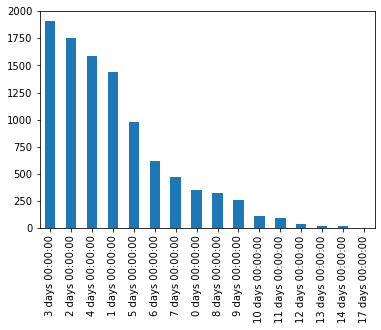

In [80]:
#ligne 131
#add a new column 'delay' to datat and plot this.

delay = shipping_data['DeliverDate'] - shipping_data['OrderDate'] 

datat['Delay'] = delay

datat['Delay'].value_counts().plot(kind='bar')